In [73]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [74]:
df = pd.read_csv("cleaned_car_data.csv")
df2 = pd.read_csv("raw_data_facebook_scraper.csv")
df.tail()

,marketplace_listing_title,vehicle_exterior_color,vehicle_fuel_type,vehicle_interior_color,vehicle_make_display_name,vehicle_model_display_name,vehicle_transmission_type,kms,price_In_Dollars,state
11950,2002 Mercedes-Benz Sedan,white,GASOLINE,off_white,Mercedes-Benz,sedan,AUTOMATIC,181000.0,5900.0,SA
11951,2021 Nissan Qashqai,grey,GASOLINE,black,Nissan,Qashqai,AUTOMATIC,67502.0,24950.0,VIC
11952,2013 Hyundai 2013 Hyundai ix35 LM3 Elite Wagon...,grey,PETROL,black,Hyundai,2013 hyundai ix35 lm3 elite wagon 5dr spts aut...,AUTOMATIC,232045.0,8990.0,VIC
11953,2024 Mercedes-Benz GLA250,black,PETROL,black,Mercedes-Benz,gla-class,AUTOMATIC,14000.0,10.0,VIC
11954,2015 Mitsubishi Lancer,white,GASOLINE,black,Mitsubishi,Lancer,AUTOMATIC,252433.0,9500.0,VIC


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11955 entries, 0 to 11954
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   marketplace_listing_title   11955 non-null  object 
 1   vehicle_exterior_color      11725 non-null  object 
 2   vehicle_fuel_type           10425 non-null  object 
 3   vehicle_interior_color      9658 non-null   object 
 4   vehicle_make_display_name   11841 non-null  object 
 5   vehicle_model_display_name  11452 non-null  object 
 6   vehicle_transmission_type   11827 non-null  object 
 7   kms                         11801 non-null  float64
 8   price_In_Dollars            11822 non-null  float64
 9   state                       11834 non-null  object 
dtypes: float64(2), object(8)
memory usage: 934.1+ KB


In [76]:
df.shape

(11955, 10)

In [77]:
df.columns

Index(['marketplace_listing_title', 'vehicle_exterior_color',
       'vehicle_fuel_type', 'vehicle_interior_color',
       'vehicle_make_display_name', 'vehicle_model_display_name',
       'vehicle_transmission_type', 'kms', 'price_In_Dollars', 'state'],
      dtype='object')

In [78]:
df.describe()

,kms,price_In_Dollars
count,11801.000000,1.182200e+04
mean,171374.562918,2.201121e+04
std,109926.071858,1.397402e+05
min,300.000000,1.000000e+00
25%,100000.000000,5.766000e+03
50%,163000.000000,1.200000e+04
75%,229000.000000,2.350000e+04
max,1000000.000000,9.999999e+06


In [79]:
df.duplicated().sum()

np.int64(14)

In [80]:
df.isnull().sum()

marketplace_listing_title        0
vehicle_exterior_color         230
vehicle_fuel_type             1530
vehicle_interior_color        2297
vehicle_make_display_name      114
vehicle_model_display_name     503
vehicle_transmission_type      128
kms                            154
price_In_Dollars               133
state                          121
dtype: int64

In [81]:
df.dropna(inplace=True)

In [82]:
df.shape

(8694, 10)

In [83]:
df.drop_duplicates(inplace=True)
df.shape

(8689, 10)

In [84]:
df['creation_year'] = pd.to_datetime(df2['creation_time'], unit='s').dt.year

In [85]:
df["creation_year"].value_counts()

creation_year
2025.0    6229
2026.0    2371
2024.0      72
2023.0      13
2022.0       4
Name: count, dtype: int64

### Taken creation year from facebook scraper data to make model best

# Eda

In [103]:
df.tail()

,marketplace_listing_title,vehicle_exterior_color,vehicle_fuel_type,vehicle_interior_color,vehicle_make_display_name,vehicle_model_display_name,vehicle_transmission_type,kms,price_In_Dollars,state,creation_year
11950,2002 Mercedes-Benz Sedan,white,GASOLINE,off_white,Mercedes-Benz,sedan,AUTOMATIC,181000.0,5900.0,SA,2026.0
11951,2021 Nissan Qashqai,grey,GASOLINE,black,Nissan,Qashqai,AUTOMATIC,67502.0,24950.0,VIC,2026.0
11952,2013 Hyundai 2013 Hyundai ix35 LM3 Elite Wagon...,grey,PETROL,black,Hyundai,2013 hyundai ix35 lm3 elite wagon 5dr spts aut...,AUTOMATIC,232045.0,8990.0,VIC,2026.0
11953,2024 Mercedes-Benz GLA250,black,PETROL,black,Mercedes-Benz,gla-class,AUTOMATIC,14000.0,10.0,VIC,2025.0
11954,2015 Mitsubishi Lancer,white,GASOLINE,black,Mitsubishi,Lancer,AUTOMATIC,252433.0,9500.0,VIC,2025.0


In [87]:
df.columns

Index(['marketplace_listing_title', 'vehicle_exterior_color',
       'vehicle_fuel_type', 'vehicle_interior_color',
       'vehicle_make_display_name', 'vehicle_model_display_name',
       'vehicle_transmission_type', 'kms', 'price_In_Dollars', 'state',
       'creation_year'],
      dtype='object')

<Axes: xlabel='price_In_Dollars', ylabel='Count'>

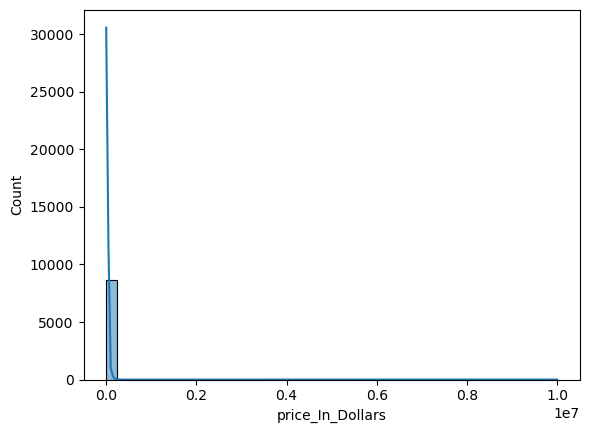

In [88]:
sns.histplot(df["price_In_Dollars"], bins=40, kde=True)

- This plot shows the overall distribution of car prices in the dataset. 
- Most cars are listed at lower prices, while a smaller number of very expensive cars create a long right tail, making the distribution **right-skewed**. 
- These high-price values are treated as valid extreme cases rather than removed, since keeping them helps the model learn patterns for **premium/high-priced cars**.

<Axes: xlabel='kms', ylabel='Count'>

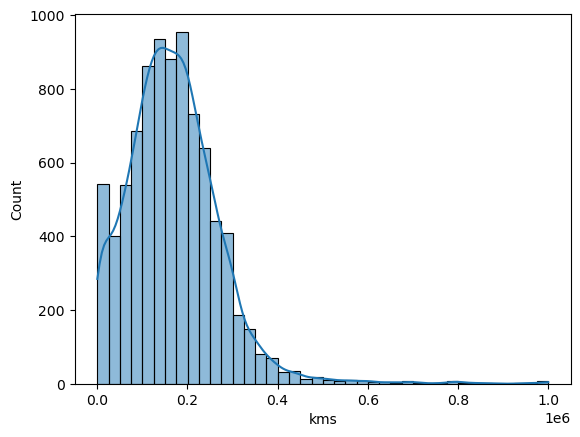

In [89]:
sns.histplot(df["kms"], bins=40, kde=True)

- This plot shows the distribution of kilometers driven across all listed cars. 
- Most vehicles fall in a moderate mileage range, while a smaller number of cars have very high mileage, creating a **right-skewed** distribution.
- This helps identify typical usage patterns and highlights extreme high-mileage vehicles present in the dataset.


<Axes: xlabel='kms', ylabel='price_In_Dollars'>

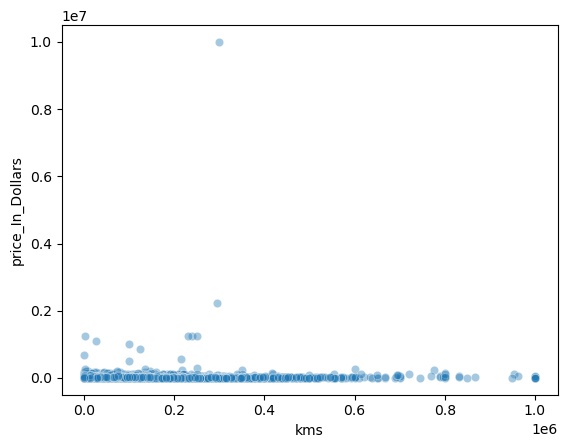

In [90]:
sns.scatterplot(data=df, x="kms", y="price_In_Dollars", alpha=0.4)

- This scatter plot shows the relationship between car price and kilometers driven.
- In general, as **kms increase, price tends to decrease**, reflecting vehicle depreciation.
- The plot also contains a few extreme high-price points, indicating premium listings or outliers that can influence model learning.


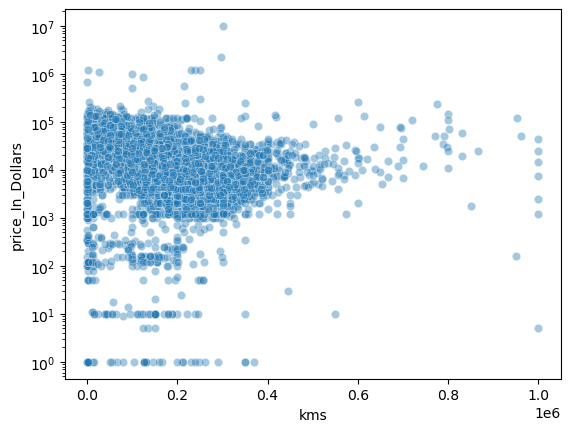

In [91]:
sns.scatterplot(data=df, x="kms", y="price_In_Dollars", alpha=0.4)
plt.yscale("log"); plt.show()


<Axes: xlabel='creation_year', ylabel='price_In_Dollars'>

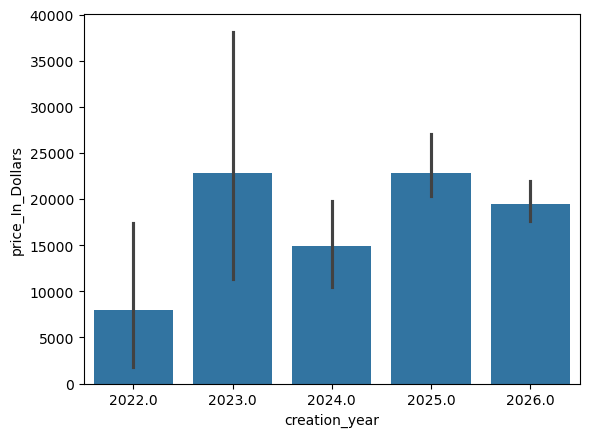

In [92]:
sns.barplot(data=df, x="creation_year", y="price_In_Dollars")

- This plot shows how car prices vary across different creation years. 
- Overall, newer model cars tend to have higher prices due to better features and lower depreciation.
- The year **2024** has the highest average price, which suggests that this year contains more **premium or high-priced listings**, increasing the overall mean.


<Axes: xlabel='count', ylabel='vehicle_make_display_name'>

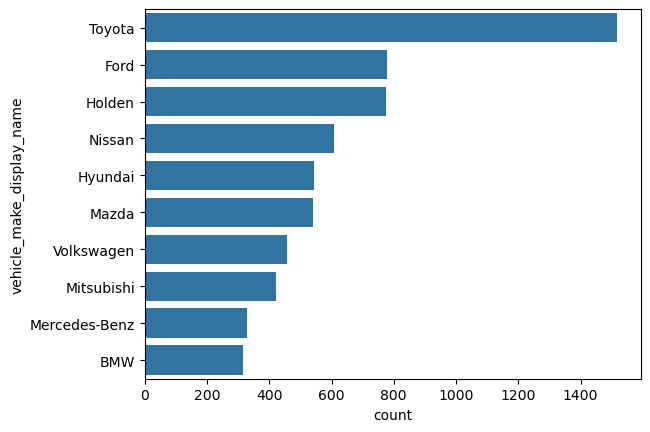

In [93]:
sns.countplot(data=df, y="vehicle_make_display_name", order=df["vehicle_make_display_name"].value_counts().head(10).index)

- This plot shows the most frequently listed car brands in the dataset (Top 10). 
- It helps understand which brands dominate the marketplace and have higher availability. 
- **Toyota** has the highest number of listings, indicating strong market presence and supply. 
- On the other hand, **BMW** has the lowest count among the top 10, showing comparatively fewer listings in this dataset.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'DIESEL'),
  Text(1, 0, 'GASOLINE'),
  Text(2, 0, 'PETROL'),
  Text(3, 0, 'HYBRID'),
  Text(4, 0, 'ELECTRIC'),
  Text(5, 0, 'OTHER'),
  Text(6, 0, 'FLEX'),
  Text(7, 0, 'PLUGIN_HYBRID')])

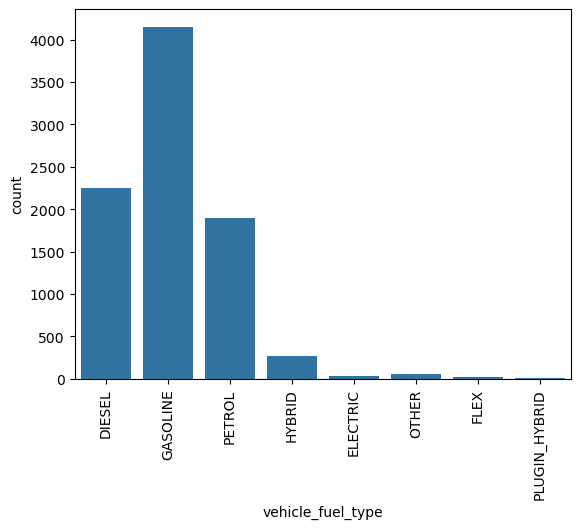

In [94]:
sns.countplot(x="vehicle_fuel_type", data=df)
plt.xticks(rotation=90)

- This bar chart shows the distribution of vehicle listings across different fuel types.  
- The dataset is dominated by **gasoline-powered vehicles**, followed by **diesel** and **petrol**.  
- Alternative fuel vehicles such as **hybrid, electric, flex, and plug-in hybrid** appear in very small numbers, indicating limited representation in the dataset.

This imbalance suggests that fuel type may have a strong influence on pricing and availability, and special handling may be required during modeling to avoid bias toward the majority fuel categories.


<Axes: xlabel='vehicle_transmission_type', ylabel='count'>

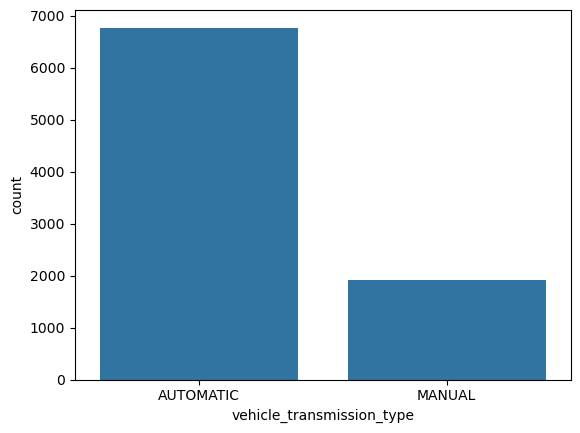

In [97]:
sns.countplot(x="vehicle_transmission_type", data=df)

- This chart illustrates the distribution of vehicle listings by transmission type.  
- **Automatic transmissions** dominate the dataset, significantly outnumbering **manual transmissions**.

This indicates a strong market preference for automatic vehicles, which is an important factor to consider during feature analysis and pricing models, as transmission type may have a notable impact on vehicle value.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Bentley'),
  Text(1, 0, 'Western Star'),
  Text(2, 0, 'Lamborghini'),
  Text(3, 0, 'Kenworth'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Scania'),
  Text(6, 0, 'UD'),
  Text(7, 0, 'Mack'),
  Text(8, 0, 'Ram'),
  Text(9, 0, 'Willys')])

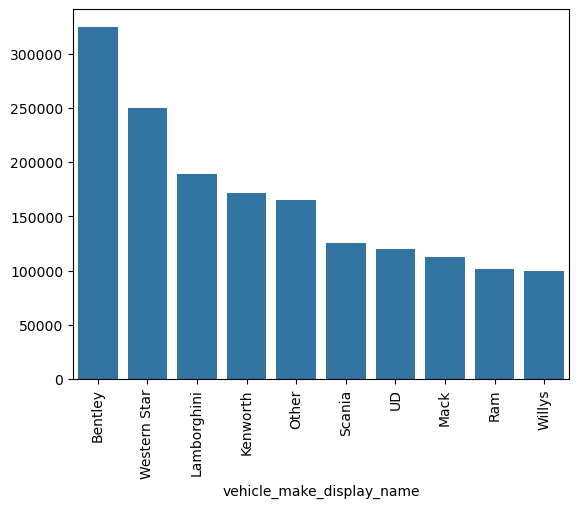

In [99]:
avg_price_make = (
    df.groupby("vehicle_make_display_name")["price_In_Dollars"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
sns.barplot(x=avg_price_make.index, y=avg_price_make.values)
plt.xticks(rotation=90)

- This bar chart presents the average vehicle price across the top manufacturers in the dataset.  
- Luxury and premium brands such as **Bentley** and **Lamborghini** command significantly higher average prices, while commercial and mass-market brands appear in the mid to lower price range.

The clear price variation across manufacturers indicates that vehicle make is a strong predictor of price and should be treated as an important feature during modeling.


<Axes: xlabel='count', ylabel='state'>

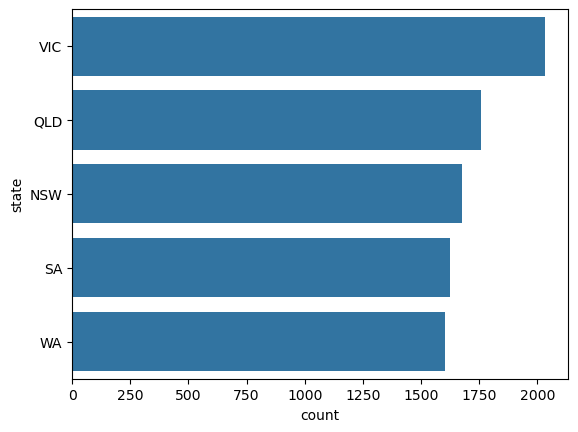

In [100]:
sns.countplot(
    y="state",
    data=df,
    order=df["state"].value_counts().index
)

- This bar chart shows the total number of car listings across different Australian states.  
- **VIC** has the highest count of listings, followed by **QLD** and **NSW**, while **WA** has the lowest count among the shown states.  

This indicates that the dataset is slightly more concentrated in **Victoria**, meaning state/location can influence availability and pricing trends.  


<Axes: ylabel='state'>

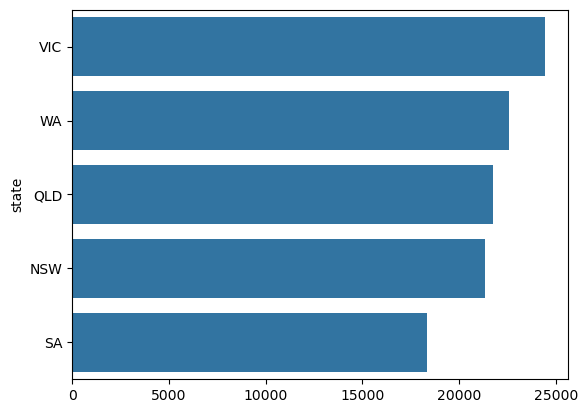

In [102]:
avg_price_state = (
    df.groupby("state")["price_In_Dollars"]
    .mean()
    .sort_values(ascending=False)
)
sns.barplot(x=avg_price_state.values, y=avg_price_state.index)

- This bar chart represents the **average vehicle price across different states**.  
- **VIC** has the highest average car price, indicating more premium or newer listings in that state.  
- States like **SA** show comparatively lower average prices, suggesting more budget-friendly or older vehicles.  

This highlights that **state/location impacts vehicle pricing**, so it can be an important feature for price prediction modeling.


<Axes: xlabel='vehicle_exterior_color'>

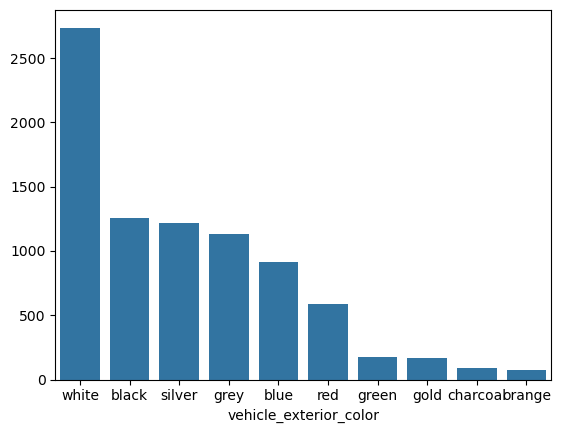

In [104]:
top_ext_colors = df["vehicle_exterior_color"].value_counts().head(10)
sns.barplot(x=top_ext_colors.index, y=top_ext_colors.values)

- This bar chart shows the **Top 10 most common exterior colors** of vehicles in the dataset.  
- **White** is the most frequently listed color, followed by **black**, **silver**, and **grey**, showing strong market preference for neutral colors.  - Rare colors such as **gold, charcoal, and orange** appear in very small numbers.  

This indicates that exterior color trends are highly skewed toward popular shades, and color may have a minor but noticeable influence on demand and pricing.

<Axes: xlabel='vehicle_interior_color'>

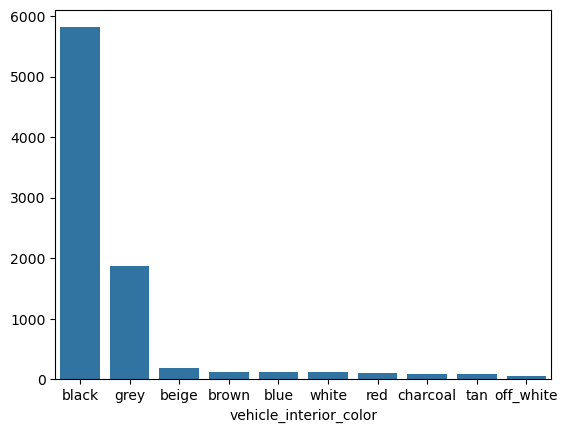

In [105]:
top_int_colors = df["vehicle_interior_color"].value_counts().head(10)
sns.barplot(x=top_int_colors.index, y=top_int_colors.values)

- This bar chart displays the **Top 10 most common interior colors** in the dataset.  
- **Black interiors** dominate the listings, followed by **grey**, showing that darker interiors are the most preferred in the market.  
- Colors like **beige, brown, tan, and off-white** appear much less frequently, indicating they are comparatively rare.  

This suggests that interior color is highly imbalanced and may contribute slightly to price variation, especially for premium interior shades.


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'PLUGIN_HYBRID'),
  Text(1, 0, 'ELECTRIC'),
  Text(2, 0, 'DIESEL'),
  Text(3, 0, 'FLEX'),
  Text(4, 0, 'OTHER'),
  Text(5, 0, 'HYBRID'),
  Text(6, 0, 'GASOLINE'),
  Text(7, 0, 'PETROL')])

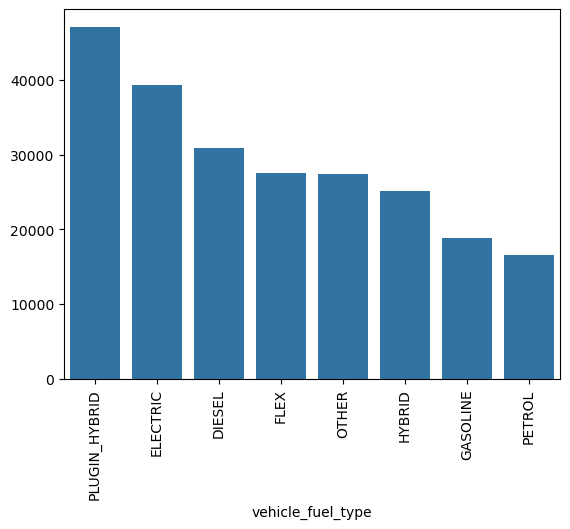

In [108]:
avg_price_fuel = (
    df.groupby("vehicle_fuel_type")["price_In_Dollars"]
    .mean()
    .sort_values(ascending=False)
)
sns.barplot(x=avg_price_fuel.index, y=avg_price_fuel.values)
plt.xticks(rotation=90)

- This bar chart shows the **average vehicle price for each fuel type**.  
- Alternative fuel vehicles like **Plug-in Hybrid** and **Electric** have the highest average prices, reflecting their premium segment and newer technology.  
- Traditional fuel types such as **Petrol** and **Gasoline** have lower average prices, likely due to higher availability and older vehicle listings.  

This indicates that **fuel type strongly influences vehicle pricing** and should be considered an important predictive feature in modeling.


<Axes: xlabel='vehicle_transmission_type'>

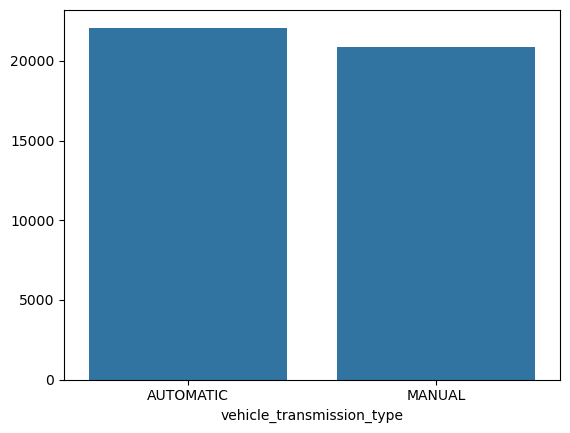

In [110]:
avg_price_trans = (
    df.groupby("vehicle_transmission_type")["price_In_Dollars"]
    .mean()
    .sort_values(ascending=False)
)
sns.barplot(x=avg_price_trans.index, y=avg_price_trans.values)

- This bar chart shows the **average vehicle price based on transmission type**.  
- Vehicles with **Automatic transmission** have a slightly higher average price compared to **Manual transmission**.  
- This reflects market preference for automatic cars, especially in newer and premium segments.  

This suggests that **transmission type impacts vehicle pricing**, so it is a useful feature for price prediction modeling.


<Axes: xlabel='vehicle_model_display_name'>

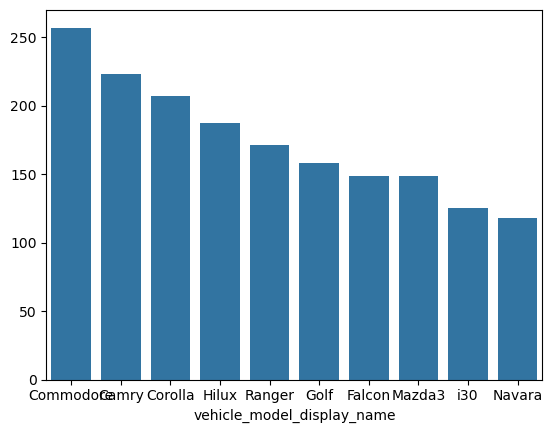

In [114]:
top_models = df["vehicle_model_display_name"].value_counts().head(10)
sns.barplot(x=top_models.index, y=top_models.values)

- This bar chart displays the **Top 10 most frequently listed vehicle models** in the dataset.  
- Models like **Commodore, Camry, and Corolla** appear most often, indicating they are highly popular and commonly available in the market.  
- The presence of repeated mainstream models suggests the dataset is dominated by **high-demand, mass-market vehicles**.  

This insight is useful because popular models may have more stable pricing patterns, and **vehicle model can be a strong predictor of price** during modeling.


## Final EDA Conclusion

The exploratory data analysis highlights clear patterns in the used car marketplace dataset. Vehicle prices show a wide distribution with noticeable skewness, indicating the presence of both budget and premium listings. Mileage (kms) displays a strong usage spread, and the **Price vs Kms** relationship confirms depreciation — cars with higher kilometers generally sell for lower prices. Similarly, **newer creation years tend to have higher prices**, proving year/age is a major pricing factor.

Categorical analysis shows the dataset is dominated by common fuel types (mainly petrol/gasoline) and automatic transmissions, reflecting real market preference. Brand and model distributions reveal a strong presence of mass-market vehicles, while luxury brands have significantly higher average prices. State-wise analysis indicates geographic imbalance in listings and noticeable regional price differences, meaning location also impacts vehicle value. Color trends show buyers prefer neutral shades (white/black/grey), while rare colors appear infrequently.

Overall, EDA confirms that **kms, creation_year, vehicle_make, vehicle_model, fuel type, transmission type, and state** are the strongest features influencing price. These insights provide a strong base for feature engineering, encoding, and building an accurate car price prediction model.
